170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2922 - loss: 1.9140 - val_accuracy: 0.5159 - val_loss: 1.3861
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4788 - loss: 1.4491 - val_accuracy: 0.5582 - val_loss: 1.2450
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5374 - loss: 1.2874 - val_accuracy: 0.6027 - val_loss: 1.1123
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5793 - loss: 1.1870 - val_accuracy: 0.6305 - val_loss: 1.0428
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6144 - loss: 1.0908 - val_accuracy: 0.6505 - val_loss: 0.9978
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6290 - loss: 1.0505 - val_accuracy: 0.6650 - val_loss: 0.9617
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6458 - loss: 1.0008 - val_accuracy: 0.6732 - val_loss: 0.9431
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6609 - loss: 0.9705 - val_accuracy: 0

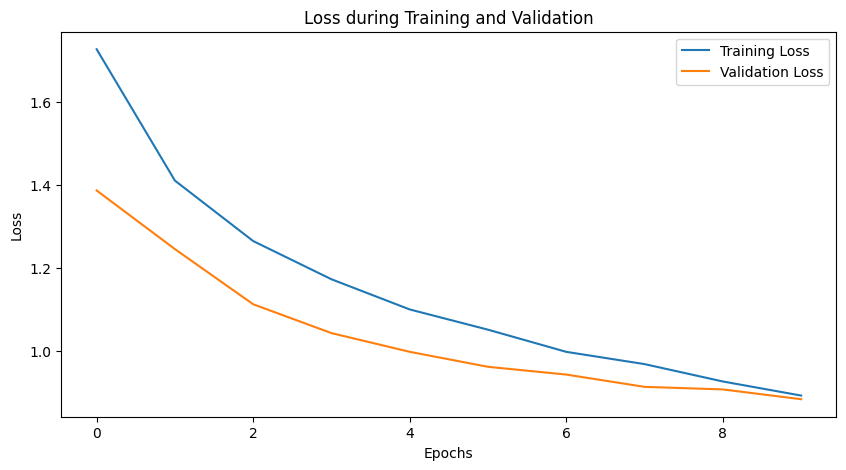

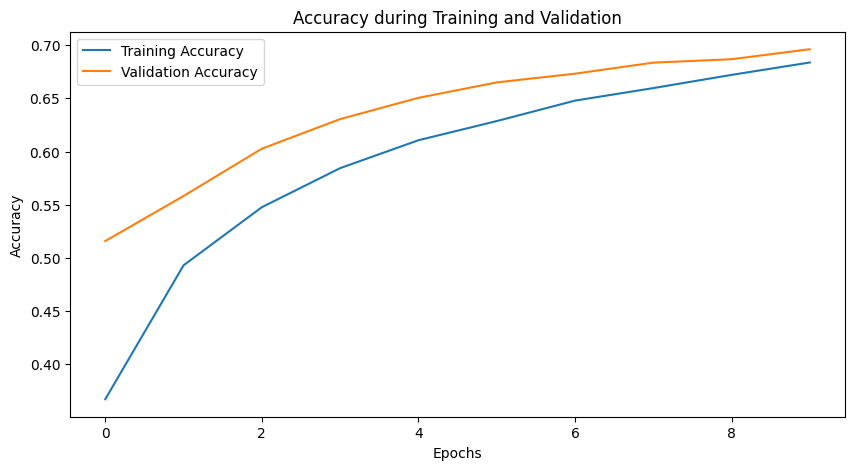

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


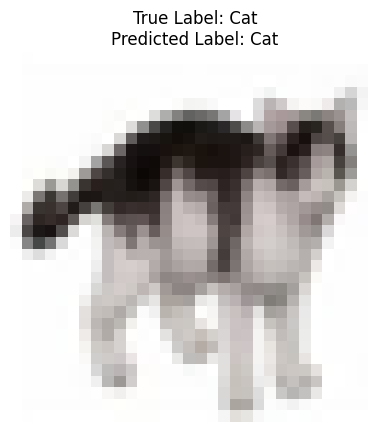

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Step 2: Build the CNN model
model = Sequential([
    # Convolutional layer with 32 filters, 3x3 kernel size, ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # MaxPooling layer with a 2x2 pool size
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer with 64 filters
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the 2D outputs to 1D for the dense layers
    Flatten(),

    # Fully connected layer with 128 units
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting

    # Output layer with 10 units for 10 classes, softmax activation
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='categorical_crossentropy',  # Cross-entropy loss for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

# Step 3: Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=10,
    batch_size=64,
    verbose=1
)

# Step 4: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

# Step 5: Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 6: Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 7: Predict and visualize results
import numpy as np

class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Randomly select a test image
random_idx = np.random.randint(0, X_test.shape[0])
test_image = X_test[random_idx]
test_label = y_test[random_idx]

# Model prediction
predicted_label = np.argmax(model.predict(test_image[np.newaxis, ...]), axis=-1)

# Display the test image and prediction
plt.imshow(test_image)
plt.title(f"True Label: {class_names[np.argmax(test_label)]}\nPredicted Label: {class_names[predicted_label[0]]}")
plt.axis('off')
plt.show()
